In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)
from google.colab import drive
%matplotlib inline

# Load Dataset

Light-duty vehicle model spesific fuel consumption and carbon dioxide emission for retail sale in Canada [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)
- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-07-28 13:21:40--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   422KB/s    in 0.2s    

2019-07-28 13:21:40 (422 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



# Data Preprocessing and Exploratory 

In [25]:
file_path = "gdrive/My Drive/Digi Talent/Projects/Linear Regression/data.csv"
df_fuel = pd.read_csv("FuelConsumption.csv")
df_fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Finding out unique values of categorical features

In [14]:
df_fuel.MAKE.unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [16]:
df_fuel.VEHICLECLASS.unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [17]:
df_fuel.TRANSMISSION.unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

## Finding insight from numerical features

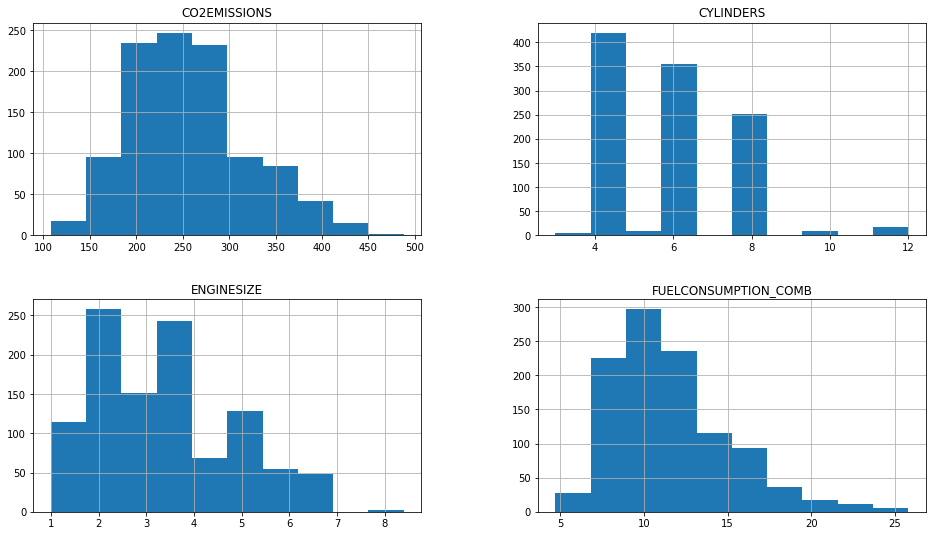

In [32]:
cdf.hist()
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [18]:
df_fuel.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [26]:
cdf = df_fuel[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


**Relationship between features**

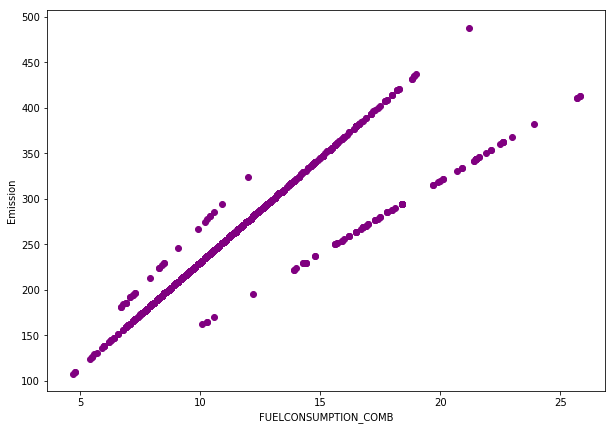

In [35]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='purple')
plt.rcParams["figure.figsize"] = [10,7]
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

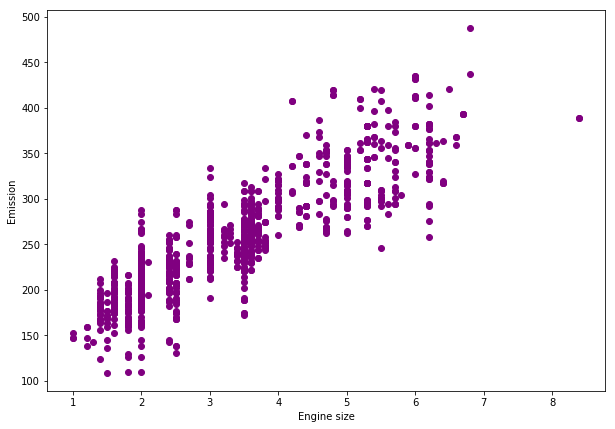

In [36]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='purple')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

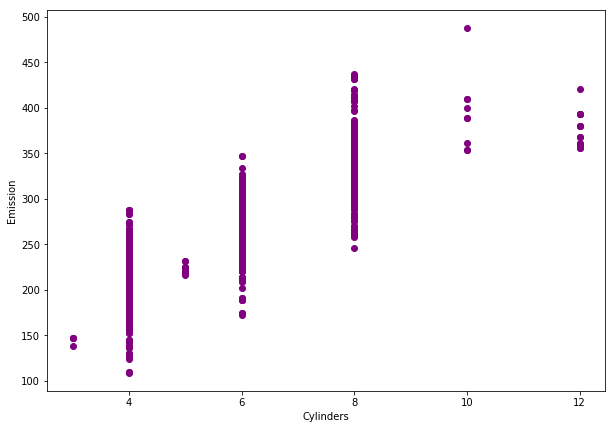

In [38]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='purple')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

# Trainning and optimizing model

## Creating train and test dataset

In this notebook, we will build a model to predict CO2 Emissions based on the engine size of a car. As both appears to have a linear but rather unpredictive distribution.

In [0]:
#train and test set creation
msk = np.random.rand(len(df_fuel)) < 0.8
train = df_fuel[msk]
test = df_fuel[~msk]

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

## Trainning Model 

Gradient descent will be used to optimize the linear regression model built. Optimization of the m and c values of regression model is the objective. The barometer used to determine the quality of those values is mean squared error 

In [53]:
%%time
# Building the model
m = 0 # slope 
c = 0 # intercept

L = 0.0001 # learning rate
epochs = 50000 # iterations

n = float(len(train_x))

# performing gradient descent
for i in range(epochs):
    Y_pred = m*train_x + c
    D_m = (-2/n) * sum(train_x * (train_y - Y_pred))
    D_c = (-2/n) * sum(train_y - Y_pred)
    m = m - L * D_m
    c = c - L * D_c

print("The slope of the model : ", m)
print("The intercept of the model :", c)

The slope of the model :  [45.94977138]
The intercept of the model : [98.85360507]
CPU times: user 54 s, sys: 46.4 ms, total: 54 s
Wall time: 54.1 s


# Evaluation

## Ploting model

Text(0, 0.5, 'Emission')

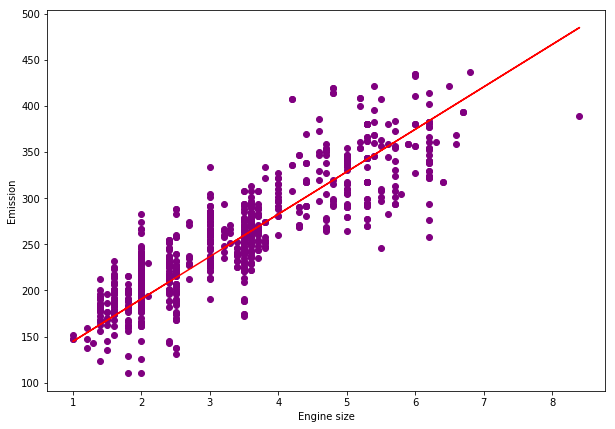

In [54]:
# Plot the model
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='purple')
plt.plot(train_x, m*train_x + c, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Calculate accuracy


The accuracy of the model will be calculated by comparing the test set and the prediction of the model. The following metrics will be used

1.   MSE (Mean Squared Error) = Represent the squared differences between prediction and test set
2.   R2-Score = Represents how close the test set are to the fitted regression line




In [55]:
from sklearn.metrics import r2_score

# Making predictions
y_hat = m*test_x + c

# Calculate accuracy
print("MSE: %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat, test_y))

MSE: 1090.32
R2-score: 0.76
